## Credit card applications
<p>Commercial banks receive <em>a lot</em> of applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low income levels, or too many inquiries on an individual's credit report, for example. Manually analyzing these applications is mundane, error-prone, and time-consuming (and time is money!). Luckily, this task can be automated with the power of machine learning and pretty much every commercial bank does so nowadays. In this notebook, we will build an automatic credit card approval predictor using machine learning techniques, just like the real banks do.</p>
<p>We'll use the <a href="http://archive.ics.uci.edu/ml/datasets/credit+approval">Credit Card Approval dataset</a> from the UCI Machine Learning Repository. The structure of this notebook is as follows:</p>
<ul>
<li>First, we will start off by loading and viewing the dataset.</li>
<li>We will see that the dataset has a mixture of both numerical and non-numerical features, that it contains values from different ranges, plus that it contains a number of missing entries.</li>
<li>We will have to preprocess the dataset to ensure the machine learning model we choose can make good predictions.</li>
<li>After our data is in good shape, we will do some exploratory data analysis to build our intuitions.</li>
<li>Finally, we will build a machine learning model that can predict if an individual's application for a credit card will be accepted.</li>
</ul>
<p>First, loading and viewing the dataset. We find that since this data is confidential, the contributor of the dataset has anonymized the feature names.</p>

## 1. Loading the Data

In [2]:
# Importing pandas as pd
import pandas as pd

# Load dataset
cc_apps = pd.read_csv("cc_approvals.data",header =None)

# Let's Inspect the Data
cc_apps.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


## 2. Inspecting the applications
<p>The output may appear a bit confusing at its first sight, but let's try to figure out the most important features of a credit card application. The features of this dataset have been anonymized to protect the privacy, but <a href="http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html">this blog</a> gives us a pretty good overview of the probable features. The probable features in a typical credit card application are <code>Gender</code>, <code>Age</code>, <code>Debt</code>, <code>Married</code>, <code>BankCustomer</code>, <code>EducationLevel</code>, <code>Ethnicity</code>, <code>YearsEmployed</code>, <code>PriorDefault</code>, <code>Employed</code>, <code>CreditScore</code>, <code>DriversLicense</code>, <code>Citizen</code>, <code>ZipCode</code>, <code>Income</code> and finally the <code>ApprovalStatus</code>. This gives us a pretty good starting point, and we can map these features with respect to the columns in the output.   </p>
<p>As we can see from our first glance at the data, the dataset has a mixture of numerical and non-numerical features. This can be fixed with some preprocessing, but before we do that, let's learn about the dataset a bit more to see if there are other dataset issues that need to be fixed.</p>

### 2.1 Lets first inspect the Data

In [3]:
# Printing summary statistics
cc_apps_description = cc_apps.describe()
print(cc_apps_description,"\n")


# Printing DataFrame information
cc_apps_info = cc_apps.info()
print(cc_apps_info,"\n")

# Let's check the unique values of first column
print("Unique values of First Column are:",cc_apps.iloc[:,0].unique())

               2           7          10             14
count  690.000000  690.000000  690.00000     690.000000
mean     4.758725    2.223406    2.40000    1017.385507
std      4.978163    3.346513    4.86294    5210.102598
min      0.000000    0.000000    0.00000       0.000000
25%      1.000000    0.165000    0.00000       0.000000
50%      2.750000    1.000000    0.00000       5.000000
75%      7.207500    2.625000    3.00000     395.500000
max     28.000000   28.500000   67.00000  100000.000000 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 no

* <p>If we Look the unique values in the last output of above cell we can see that we have character "?" in column of the data.</p>
* <p>This how missing values are represented in the data.</p>

### 2.2 Lets Drop columns 11 and 13
<p>Before dealing with missing values we need to drop some features. Features like <code>DriversLicense</code> and <code>ZipCode</code> are not as important as the other features in the dataset for predicting credit card approvals. So we can drop them.


In [4]:
# Drop the features 11 and 13 which represent DriversLicence and ZipCode
cc_apps = cc_apps.drop(columns = [11,13])

# Let's Have one more look at the data
print(cc_apps.head())

  0      1      2  3  4  5  6     7  8  9   10 12   14 15
0  b  30.83  0.000  u  g  w  v  1.25  t  t   1  g    0  +
1  a  58.67  4.460  u  g  q  h  3.04  t  t   6  g  560  +
2  a  24.50  0.500  u  g  q  h  1.50  t  f   0  g  824  +
3  b  27.83  1.540  u  g  w  v  3.75  t  t   5  g    3  +
4  b  20.17  5.625  u  g  w  v  1.71  t  f   0  s    0  +


### 2.3 Let's take a detailed look on missing values.
<p>Our dataset contains both numeric and non-numeric data (specifically data that are of <code>float64</code>, <code>int64</code> and <code>object</code> types). Specifically, the features 2, 7, 10 and 14 contain numeric values (of types float64, float64, int64 and int64 respectively) and all the other features contain non-numeric values.</p>

In [5]:
# Import numpy
import numpy as np

# Replace the '?'s with NaN in the train and test sets
cc_apps = cc_apps.replace("?",np.NaN)

# Lets check how many missing values we have
cc_apps.isna().sum()

0     12
1     12
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
12     0
14     0
15     0
dtype: int64

#### 2.3.1 Lets visualize using missingno to check for missing values

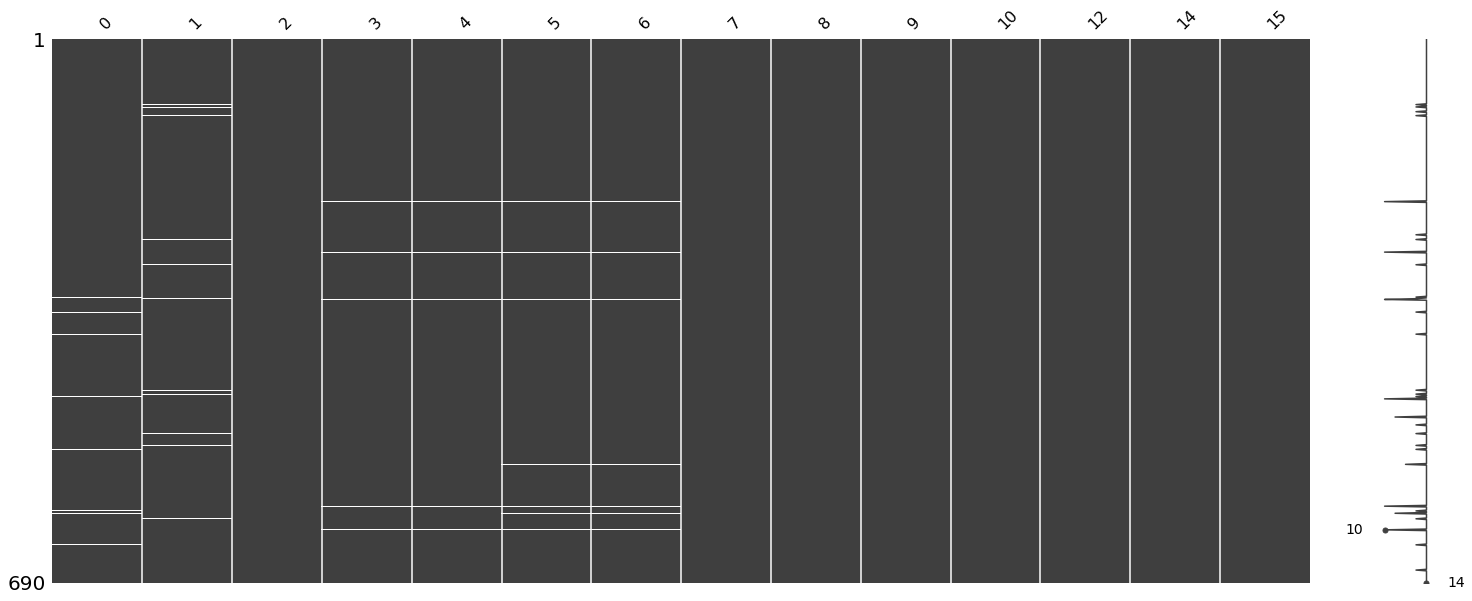

In [6]:
# Let's Visualize missing values using miisingo
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(cc_apps)
plt.show()

### 2.4 Dealing with missing values in Numerical column
<p>We replaced all the question marks with NaNs. This is going to help us in the next missing value treatment that we are going to perform.</p>
<p>An important question that gets raised here is <em>why are we giving so much importance to missing values</em>? Can't they be just ignored? Ignoring missing values can affect the performance of a machine learning model heavily. While ignoring the missing values our machine learning model may miss out on information about the dataset that may be useful for its training. Then, there are many models which cannot handle missing values implicitly such as Linear Discriminant Analysis (LDA). </p>

1. For Numerical features:
    * For Numerical features with missing values we will impute them with mean values. This is called *Mean Imputing*.

2. For Categorical features

    * For Categorical features with missing values we will impute them with value which is most repeated

In [7]:
# Let's Create a New Data Frame by copying cc_apps
new_data = cc_apps.copy()

# A for loop to deal with missing with srategies depending upon feature type
for col in new_data.columns:
    if new_data[col].dtype == 'float64':
        new_data[col].fillna(new_data[col].mean(),inplace = True)
    elif new_data[col].dtype == 'object':
        new_data[col].fillna(new_data[col].value_counts()[0],inplace = True)


#### 2.4.1 Visualizing missing values

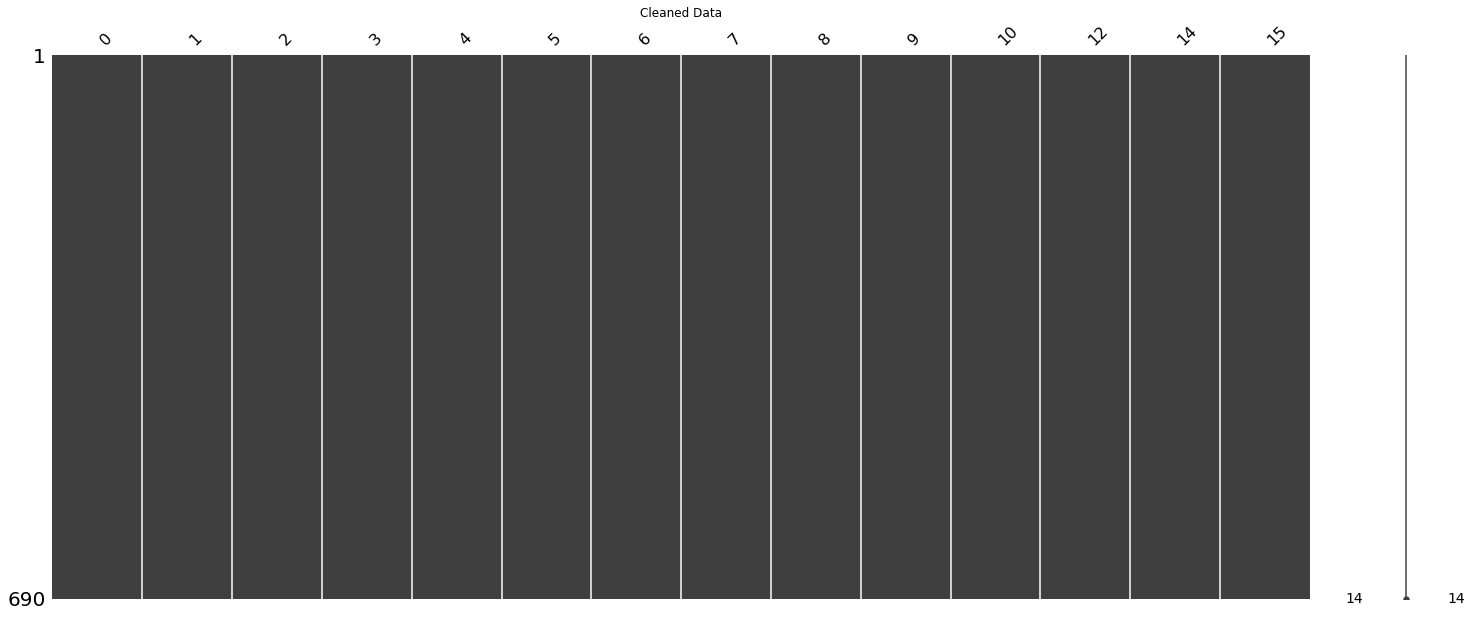

In [8]:
msno.matrix(new_data)
plt.title("Cleaned Data")
plt.show()

* Now its clear that we dont have any missing values

## 3. Splitting the dataset into train and test sets
<p>Now, we will split our data into train set and test set to prepare our data for two different phases of machine learning modeling: training and testing. Ideally, no information from the test data should be used to preprocess the training data or should be used to direct the training process of a machine learning model. Hence, we first split the data and then preprocess it.</p>

In [9]:
# Import train_test_split
from sklearn.model_selection import train_test_split



# Split into train and test sets
train_data, test_data = train_test_split(new_data, test_size=0.33, random_state=42)

## 4. Preprocessing the data (part i)
<p>The missing values are now successfully handled.</p>
<p>There is still some minor but essential data preprocessing needed before we proceed towards building our machine learning model. We are going to divide these remaining preprocessing steps into two main tasks:</p>
<ol>
<li>Convert the non-numeric data into numeric.</li>
<li>Scale the feature values to a uniform range.</li>
</ol>
<p>First, we will be converting all the non-numeric values into numeric ones. We do this because not only it results in a faster computation but also many machine learning models (like XGBoost) (and especially the ones developed using scikit-learn) require the data to be in a strictly numeric format. We will do this by using the <code>get_dummies()</code> method from pandas.</p>

In [10]:
# Convert the categorical features in the train and test sets independently
train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)

# Reindex the columns of the test set aligning with the train set
test_data = test_data.reindex(columns= train_data.columns, fill_value= 0)

## 5. Preprocessing the data (part ii)
<p>Now, we are only left with one final preprocessing step of scaling before we can fit a machine learning model to the data. </p>
<p>Now, let's try to understand what these scaled values mean in the real world. Let's use <code>CreditScore</code> as an example. The credit score of a person is their creditworthiness based on their credit history. The higher this number, the more financially trustworthy a person is considered to be. So, a <code>CreditScore</code> of 1 is the highest since we're rescaling all the values to the range of 0-1.</p>

In [11]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Segregate features and labels into separate variables
X_train, y_train = train_data.iloc[:, :-1].values, train_data.iloc[:, [-1]].values
X_test, y_test = test_data.iloc[:, :-1].values, test_data.iloc[:, [-1]].values

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

## 5. Fitting a logistic regression model to the train set
Essentially, predicting if a credit card application will be approved or not is a **classification** According to UCI, our dataset contains more instances that correspond to "Denied" status than instances corresponding to "Approved" status. Specifically, out of 690 instances, there are 383 (55.5%) applications that got denied and 307 (44.5%) applications that got approved.
<p>This gives us a benchmark. A good machine learning model should be able to accurately predict the status of the applications with respect to these statistics.</p>
<p>For this linear models like Logistic Regression we will work very well</p>

In [12]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledX_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

## 6. Making predictions and evaluating performance
<p>But how well does our model perform? </p>
<p>We will now evaluate our model on the test set with respect to <a href="https://developers.google.com/machine-learning/crash-course/classification/accuracy">classification accuracy</a>. But we will also take a look the model's <a href="http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/">confusion matrix</a>. In the case of predicting credit card applications, it is important to see if our machine learning model is equally capable of predicting approved and denied status, in line with the frequency of these labels in our original dataset. If our model is not performing well in this aspect, then it might end up approving the application that should have been approved. The confusion matrix helps us to view our model's performance from these aspects.  </p>

In [13]:
# Importin confusion_matrix
from sklearn.metrics import confusion_matrix

# Using logreg to predict instances from the test set and storing it
y_pred = logreg.predict(rescaledX_test)

# Geting the accuracy score of logreg model and printing it
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test,y_test))

# Printing the confusion matrix of the logreg model
print(confusion_matrix(y_test,y_pred))

Accuracy of logistic regression classifier:  1.0
[[103   0]
 [  0 125]]


## 7. Grid searching and making the model perform better
<p>Our model was pretty good! In fact it was able to yield an accuracy score of 100%.</p>
<p>For the confusion matrix, the first element of the of the first row of the confusion matrix denotes the true negatives meaning the number of negative instances (denied applications) predicted by the model correctly. And the last element of the second row of the confusion matrix denotes the true positives meaning the number of positive instances (approved applications) predicted by the model correctly.</p>
<p>But if we hadn't got a perfect score what's to be done?. We can perform a <a href="https://machinelearningmastery.com/how-to-tune-algorithm-parameters-with-scikit-learn/">grid search</a> of the model parameters to improve the model's ability to predict credit card approvals.</p>
<p><a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">scikit-learn's implementation of logistic regression</a> consists of different hyperparameters but we will grid search over the following two:</p>
<ul>
<li>tol</li>
<li>max_iter</li>
</ul>

In [14]:
# Importing GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of values for tol and max_iter
tol = [0.01,0.001,0.0001]
max_iter = [100,150,200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol= tol, max_iter=max_iter)

## 8. Finding the best performing model
<p>We have defined the grid of hyperparameter values and converted them into a single dictionary format which <code>GridSearchCV()</code> expects as one of its parameters. Now, we will begin the grid search to see which values perform best.</p>
<p>We will instantiate <code>GridSearchCV()</code> with our earlier <code>logreg</code> model with all the data we have. We will also instruct <code>GridSearchCV()</code> to perform a <a href="https://www.dataschool.io/machine-learning-with-scikit-learn/">cross-validation</a> of five folds.</p>
<p>We'll end the notebook by storing the best-achieved score and the respective best parameters.</p>
<p>While building this credit card predictor, we tackled some of the most widely-known preprocessing steps such as <strong>scaling</strong>, <strong>label encoding</strong>, and <strong>missing value imputation</strong>. We finished with some <strong>machine learning</strong> to predict if a person's application for a credit card would get approved or not given some information about that person.</p>

In [15]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Fit grid_model to the data
grid_model_result = grid_model.fit(rescaledX_train,y_train)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

In [16]:
# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score,best_params))

# Extract the best model and evaluate it on the test set
best_model = grid_model_result.best_estimator_
print("Accuracy of logistic regression classifier: ", best_model.score(rescaledX_test, y_test))

Best: 1.000000 using {'max_iter': 100, 'tol': 0.01}
Accuracy of logistic regression classifier:  1.0


## 9. Plotting the ROC Curve
- ROC curve is an incredibly useful tool in evaluating and comparing predictive models.

- Its name is indeed strange. ROC stands for Receiver Operating Characteristic. Its origin is from sonar back in the 1940s. ROCs were used to measure how well a sonar signal (e.g., from an enemy submarine) could be detected from noise (a school of fish).

- ROC curves are a nice way to see how any predictive model can distinguish between the true positives and negatives.

- In order to do this, a model needs to not only correctly predict a positive as a positive, but also a negative as a negative.

- The ROC curve does this by plotting sensitivity, the probability of predicting a real positive will be a positive, against 1-specificity, the probability of predicting a real negative will be a positive. (A previous article covered the specifics of sensitivity and specificity. It reviews what they mean and why it’s important to know how accurately the model is predicting positives and negatives separately.)

- The best decision rule is high on sensitivity (true positive rate) and low on 1-specificity (false positive rate). It’s a rule that predicts most true positives will be a positive and few true negatives will be a positive.


In [45]:
# Plotting ROC curve
from sklearn.metrics import roc_curve
y_pred_prob = grid_model_result.predict_proba(rescaledX_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

import plotly
import plotly.graph_objects as go
import plotly.io as pio


fig = go.Figure()
fig.add_trace(go.Scatter(x = [0,1],y = [0,1], mode = 'lines',name = ''))
fig.add_trace(go.Scatter(x = fpr,y = tpr, mode = 'lines',name = "Logitic Regression"))
fig.update_layout({'xaxis':{'title':{'text':"False postive Rate"}},\
    'yaxis':{'title':{'text':"True postive Rate"}},\
        'title':{"text":"ROC Curve",'x' : 0.45,'y' : 0.87}
    })

